In [61]:
import pandas as pd
app=pd.read_csv('googleplaystore.csv')
print(app.head())
print(app.shape)
print(app.columns)
print(app.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

It seems that there are missing values in many of the columns of the first dataset. The columns include rating, type, 
content rating, current ver and android ver.

In [62]:
review=pd.read_csv('googleplaystore_user_reviews.csv')
print(review.head())
print(review.shape)
print(review.columns)
print(review.info())
print(len(app.Rating))

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
(64295, 5)
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Ra

Missing values are also observed in the second dataset, in columns: Translated_Review, Sentiment, Sentiment_Polarity
and Sentiment_Subjectivity.

In [63]:
## Two datasets are merged on shared column App. The merged column is named as merge.
## This thrid dataset will be stored as a backup for future use, if needed.
merge=pd.merge(app, review, on='App')
print(merge.head())
print(merge.info())

                   App        Category  Rating Reviews Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   

  Price Content Rating                     Genres      Last Updated  \
0     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4     0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2    

In [64]:
## For app dataset, rows with missing value (NaN) will be removed and for review dataset, rows with missing values in 
## setiment will be removed. 
new_app=app.dropna(axis=0, how='any')
new_rev=review.dropna(axis=0, how='any')
print(new_app.info())
print(new_rev.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity

In [65]:
## Assert that there is no missing value:
assert pd.notnull(new_app).all().all()
assert pd.notnull(new_rev).all().all()

In [66]:
## Assert that all ratings in new_app are above 0:
assert (new_app['Rating']>0).all().all()

Now both original datasets have been cleaned up to remove missing values and the revised datasets are good to use for 
analysis.

The next step is to check outliers of Ratings, Sentiment_Polarity and Sentiment_Subjectivity from App and Review datasets.First, we want to identify what kinds of distribution each of these three data follows.

Begin with Rating data.

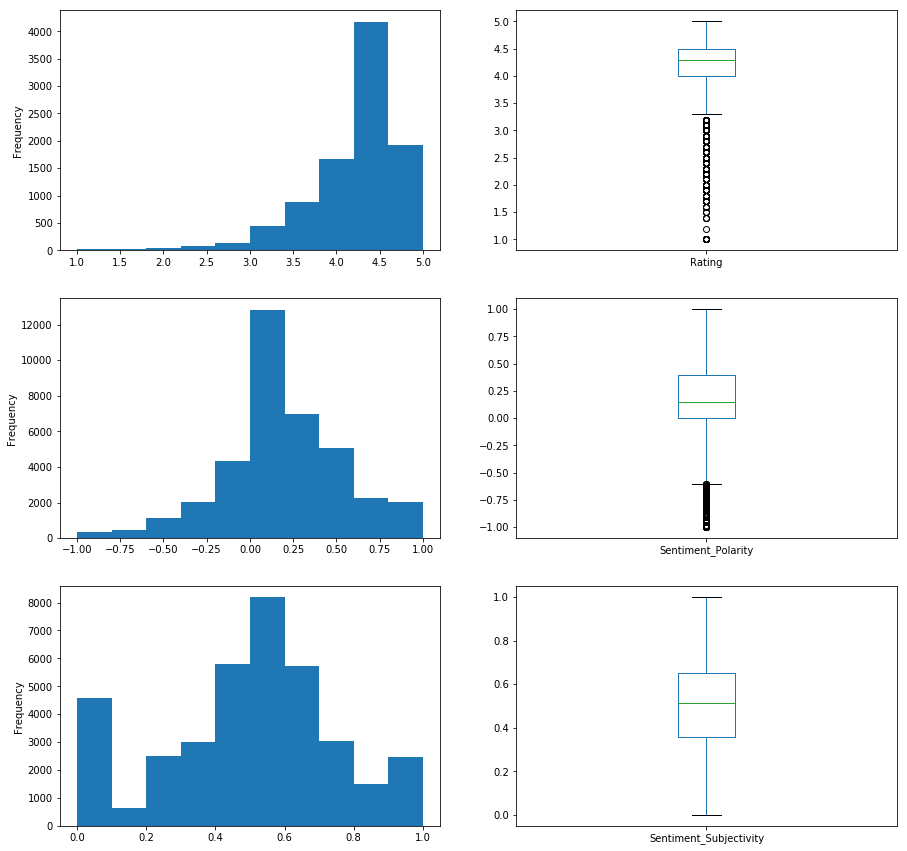

In [67]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(3,2,figsize=(15,15))
plt.subplot(3, 2, 1)
new_app['Rating'].plot(kind='hist')
plt.subplot(3, 2, 2)
new_app['Rating'].plot(kind='box')
plt.subplot(3, 2, 3)
new_rev['Sentiment_Polarity'].plot(kind='hist')
plt.subplot(3, 2, 4)
new_rev['Sentiment_Polarity'].plot(kind='box')
plt.subplot(3, 2, 5)
new_rev['Sentiment_Subjectivity'].plot(kind='hist')
plt.subplot(3, 2, 6)
new_rev['Sentiment_Subjectivity'].plot(kind='box')

plt.show()

It looks like the Rating data is not normally distributed. Instead, the Rating data seems to be left-skewed. We will try to log-transform the data into log(Rating).

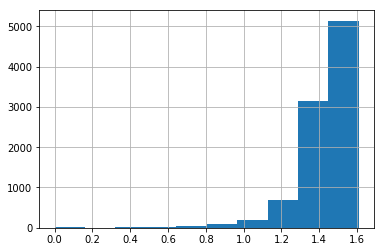

In [68]:
import numpy as np
new_app['Rating'].apply(np.log).hist()

It turned out the log transformation is not a solution to Rating data. Now, let's try exponential transformation on Rating data:

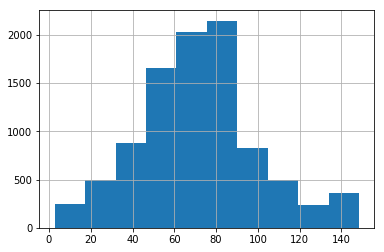

In [69]:
new_app['Rating'].apply(np.exp).hist()

The exponentially transformed Rating data follows normal distribution. Now, let's check if there is any outlier in the transformed Rating data:

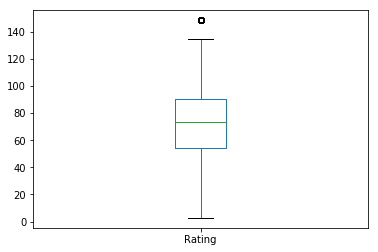

In [70]:
new_app['Rating'].apply(np.exp).plot(kind='box')
plt.show()

It turned out there is indeed outlier in the transformed Rating data. We need to identify this(these) data point(s) before making decision on whether to remove the outliers. The next step is to identify the outlier. 

In [71]:
## Add the transformed Rating data to the dataset, and name it exp_rating.
new_app['exp_rating']=new_app['Rating'].apply(np.exp)

## Define a function to locate outliers: the theory is to find data with difference from sample mean bigger than twice
## the standard deviation
def locate_outliers(data,n):
    return data[abs(data[n] - np.mean(data[n])) > 2 * np.std(data[n])]

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
locate_outliers(new_app,'exp_rating').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up,134.289780
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.289780
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.289780
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,134.289780
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up,134.289780
177,eBoox new: Reader for fb2 epub zip books,BOOKS_AND_REFERENCE,4.9,2739,21M,"50,000+",Free,0,Everyone,Books & Reference,"July 17, 2018",2.0,3.0 and up,134.289780
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,148.413159
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,13.463738
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,6.685894
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19M,"500,000+",Free,0,Mature 17+,Dating,"July 31, 2018",4.8.5,4.0.3 and up,12.182494


As we can see from the above table, these suspected outliers dont seem to be not 'wrong' or false input. These ratings are independent from each other and without seeing the detailed review on these apps, there is no strong reason to exclude them. Next, we will locate the 'outliers' for sentiment_polarity data:

In [73]:
locate_outliers(new_rev,'Sentiment_Polarity').head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
13,10 Best Foods for You,Greatest ever Completely awesome maintain heal...,Positive,0.992188,0.866667
19,10 Best Foods for You,One greatest apps.,Positive,1.000000,1.000000
30,10 Best Foods for You,Good.!!,Positive,1.000000,0.600000
36,10 Best Foods for You,Best,Positive,1.000000,0.300000
63,10 Best Foods for You,Wonderful,Positive,1.000000,1.000000
66,10 Best Foods for You,10 best foods 4u Excellent chose foods,Positive,1.000000,0.650000
69,10 Best Foods for You,Best food Thank you recipe book,Positive,1.000000,0.300000


Again, these polarity ratings seem valid, and there is no strong reason to exclude them. Therefore, the detected outliers in App rating and sentiment polarity data will not be excluded in further analysis.